## Alzheimer Stage Detection Model

Importing necessary modules

In [9]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import BinaryAccuracy, Precision,AUC,Recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from glob import glob
import matplotlib.pyplot as plt

Data Preprocessing

In [2]:
IMAGE_SIZE = [176,208]
train_path = 'D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train'
test_path = 'D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\test'

In [3]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,rotation_range=30, zoom_range = 0.1,width_shift_range=0.1,height_shift_range=0.1,shear_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train_set = train_datagen.flow_from_directory(train_path,batch_size = 128,target_size = IMAGE_SIZE,class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,batch_size = 32,target_size = IMAGE_SIZE,class_mode = 'categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


Model Architecture

In [5]:
# base_model = ResNet50(input_shape=IMAGE_SIZE + [3],include_top=False,weights='imagenet')
# base_model.trainable = False

folder = glob('D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train\\*')
model = Sequential()

# load model
ResNet = ResNet50(include_top=False, input_shape=IMAGE_SIZE + [3],pooling='avg')    
# print(ResNet.summary())
# Freezing Layers

for layer in ResNet.layers:
    layer.trainable=False
    
model.add(ResNet)
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(len(folder),activation='softmax'))

In [6]:
folder

['D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train\\MildDemented',
 'D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train\\ModerateDemented',
 'D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train\\NonDemented',
 'D:\\F\\Coding\\Projects\\Alzheimer\\Alzheimer Dataset\\train\\VeryMildDemented']

Model building and training

In [10]:
METRICS = [
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),  
      AUC(name='auc')
]

In [11]:
# model = Model(inputs = base_model.input, outputs = prediction_layer)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
p = model.fit(train_set,validation_data = test_set,epochs = 20,steps_per_epoch = len(train_set),validation_steps = len(test_set))

Epoch 1/20
41/41 [==============================] - 620s 15s/step - loss: 1.1688 - accuracy: 0.7568 - precision: 0.5179 - recall: 0.3933 - auc: 0.7719 - val_loss: 1.1160 - val_accuracy: 0.7570 - val_precision: 0.5147 - val_recall: 0.4934 - val_auc: 0.8112
Epoch 2/20
41/41 [==============================] - 578s 14s/step - loss: 0.9617 - accuracy: 0.7860 - precision: 0.6086 - recall: 0.4032 - auc: 0.8243 - val_loss: 1.0276 - val_accuracy: 0.7711 - val_precision: 0.5488 - val_recall: 0.4746 - val_auc: 0.8217
Epoch 3/20
41/41 [==============================] - 560s 14s/step - loss: 0.9281 - accuracy: 0.7927 - precision: 0.6294 - recall: 0.4152 - auc: 0.8368 - val_loss: 0.9823 - val_accuracy: 0.7895 - val_precision: 0.5940 - val_recall: 0.4988 - val_auc: 0.8321
Epoch 4/20
41/41 [==============================] - 539s 13s/step - loss: 0.9070 - accuracy: 0.8005 - precision: 0.6523 - recall: 0.4329 - auc: 0.8442 - val_loss: 0.9531 - val_accuracy: 0.7860 - val_precision: 0.6038 - val_recall: 0

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 24,706,724
Trainable params: 1,119,012
Non

Plotting Loss

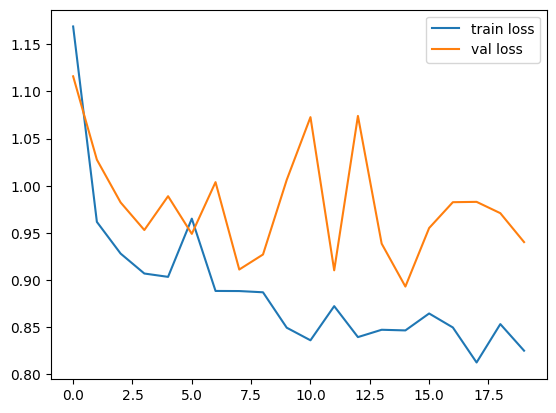

In [13]:
plt.plot(p.history['loss'],label = 'train loss')
plt.plot(p.history['val_loss'],label = 'val loss')
plt.legend()
plt.show()

Plotting Accuracy

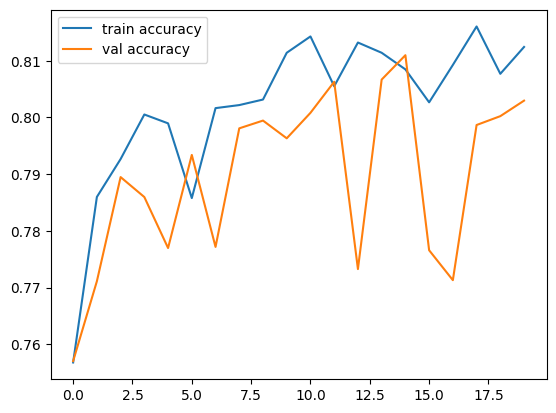

In [14]:
plt.plot(p.history['accuracy'],label = 'train accuracy')
plt.plot(p.history['val_accuracy'],label = 'val accuracy')
plt.legend()
plt.show()

Plotting AUC

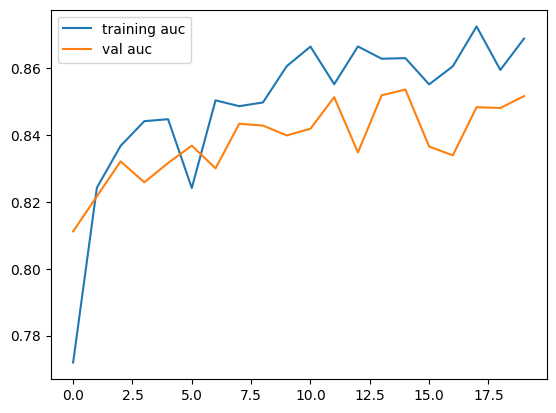

In [15]:
plt.plot(p.history['auc'],label = 'training auc')
plt.plot(p.history['val_auc'],label = 'val auc')
plt.legend()
plt.show()

Saving the model

In [ ]:
model.save('alzheimer2.h5')